## Implement K Nearest Neighbour From Scratch and Compare with the Built-in Graphically



Audity Ghosh
<br>CSE, RUET

#### Objectives:
- Implement KNN with Python
- How KNN works?
- SKlearn KNN
- Scatter Plot and Comparison


#### References:
[1] Implement KNN from scratch https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


### import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from sklearn.neighbors import KNeighborsClassifier

### plotting points based on two groups

points is a dictionary. There are two groups(keys), 0 and 1. For each group, there are some samples. Each sample has two features, indexed by 0 and 1. 

In [3]:
def plot_points(points):
    
    plt.figure()
    for group in points:
        # traverse 0 and 1 keys in points dictionary 
        for feature in points[group]: # feature is a 2 len vector for each sample in that group 
            
            # defining the color as per the group 
            if group == 1:
                c = 'blue' 
            else:
                c = 'red' 
                
            # using the two elements of feature vector to plot in x-y coordinates. 
            plt.scatter(feature[0],feature[1],color=c)
    
    plt.xlim([0, 15])
    plt.ylim([0, 15])
            
    plt.show()

### calculating distance from a test sample to other samples 

In [4]:
# the parameters are points dictionary, p = test sample row
def dis(points,p):
    
    distance=[]
    
    for group in points:
        for feature in points[group]:
            # traverse feature in each sample in each group 
            euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2) 
            # calculate distance from p            
            distance.append((euclidean_distance,group)) 
            # append calculated distance and group no in distance list
    distance = sorted(distance) 
    # sort based on calculated distance 
    
    
    return distance

### assign group to new test sample based on built in KNN

In [5]:
def cls_nn(df,p,k):
    
    X_train =  df.loc[:, df.columns != 'Y'].values
    y_train = df['Y'].values
    
    

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)


    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(np.array(p).reshape(1,-1))
    
    #print("Y_pred",y_pred,"type",type(y_pred))
    
    points[y_pred[0]].append(p) # assign that sample to predicted group 
    
    print("new point's group:",y_pred[0])
    
    plot_points(points)    
    
    

### assign group to new point using manual knn 

In [6]:
# the parameters are points dictionary, p new test sample row, k no of neighbours
def manual_knn(points,p,k):
    
    d = dis(points,p) # get the sorted distance and group of samples from points dict closest to p 
    
    neighbors = []
    
    for i in range(k):
        neighbors.append(d[i]) # get k closest neighbours 
    
    output_values = [row[-1] for row in neighbors] # get only the group no of the neighbours 
    
    #print(output_values)
    prediction = max(set(output_values), key=output_values.count) # which group memebers are max neighbours 
    
    points[prediction].append(p) # assign that sample to predicted group 
    
    print("new point's group:",prediction)
    
    plot_points(points)    

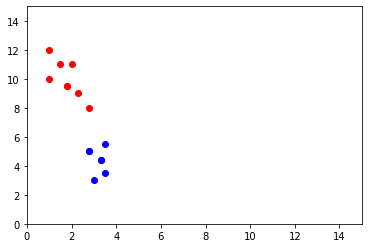

In [7]:
points = {0: [[1, 12], [1.5, 11], [1, 10], [2, 11], [2.3, 9], [1.8, 9.5], [1.8, 9.5], [2.8, 8.0]],
          1: [[3, 3], [3.5, 3.5], [3.5, 5.5], [3.3, 4.4], [3.3, 4.4], [2.8, 5.0], [2.8, 5.0]]}
# points = {0: [[1, 12]],
#           1: [[3, 3]]}
plot_points(points)


# dictionary to 2D list 
data = []
for group in points:
    for sample in points[group]:
        temp = sample
        temp.append(group)
        data.append(temp)

df = pd.DataFrame(data, columns =['X1', 'X2','Y'])




        

Enter new points: 4 13
Built in KNN predicts:
new point's group: 0


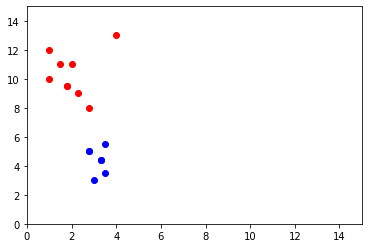

Manual KNN predicts:
new point's group: 0


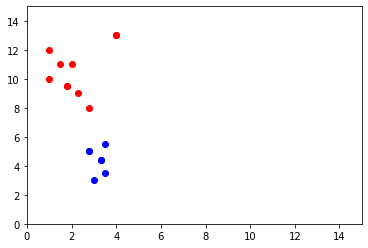

KeyboardInterrupt: Interrupted by user

In [28]:

k = 5
while True:
    p = [float(p) for p in input("Enter new points: ").split()]
    print("Built in KNN predicts:")
    cls_nn(df,p,k)  
    print("Manual KNN predicts:")
    manual_knn(points,p,k)

The input is an infinite loop while taking from the user. So the output was stopped using keyboard interrupt. It is not an error. 